# Notebook setup

**Don't forget to change the path in this cell so that Python can find the datasets for this week.**

In [1]:
# CHANGE THIS TO POINT TO YOUR WEEK 12 DATA FOLDER.
data_folder = r'C:\Users\dwmcclellan\OneDrive - Fort Lewis College\0-Fall 2021\GEOG-315\Lab-12\data'

In [2]:
import os
import arcpy

# Change the arcpy and Python working directories.
arcpy.env.workspace = data_folder
os.chdir(data_folder)

# Set up matplotlib to draw in the notebook (pandas uses matplotlib).
%matplotlib inline

# Pandas

You've used pandas dataframes to view attribute tables a few times throughout the class (in fact, that's what the `classtools` module uses). Since ArcGIS (both ArcMap and ArcPro) comes with Pandas, I'm going to show you how to read an attribute table with [pandas](https://pandas.pydata.org/) and then how to graph it. First let's import pandas and rename it to `pd`, as is convention.

In [3]:
import pandas as pd

This will create a new pandas dataframe using the columns specified in the search cursor. It uses the cursor's `fields` property to figure out what to call the dataframe columns.

In [4]:
with arcpy.da.SearchCursor('Municipalities.shp', ['POPLASTEST', 'POPLASTCEN']) as searcher:
    df = pd.DataFrame(searcher, columns=searcher.fields)

Look at the first few columns in the dataframe.

In [5]:
df.head()

,POPLASTEST,POPLASTCEN
0,1524,1451
1,2904,2454
2,881,817
3,181,177
4,872,750


Now we can [plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html) these. We have to tell it which columns to use for which axis, and that we want it to be a scatterplot instead of a line plot.

<AxesSubplot:title={'center':'Estimated vs. Actual Census population'}, xlabel='POPLASTCEN', ylabel='POPLASTEST'>

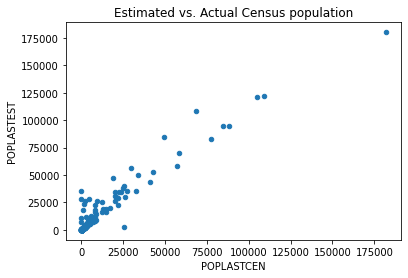

In [6]:
df.plot(x='POPLASTCEN', y='POPLASTEST', kind='scatter', title='Estimated vs. Actual Census population')

If you want to change the axis labels, you can import pyplot and set them the same way you do with matplotlib (because pandas is just using matplotlib behind the scenes).

Text(0, 0.5, 'Estimated population')

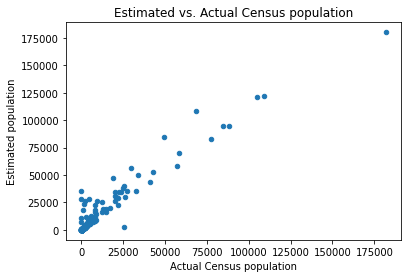

In [7]:
import matplotlib.pyplot as plt

df.plot(x='POPLASTCEN', y='POPLASTEST', kind='scatter', title='Estimated vs. Actual Census population')
plt.xlabel('Actual Census population')
plt.ylabel('Estimated population')

If you didn't want to import pyplot, you could change the column names instead, but that means more typing if you're going to use them for other things, too.

<AxesSubplot:title={'center':'Estimated vs. Actual Census population'}, xlabel='Actual Census population', ylabel='Estimated population'>

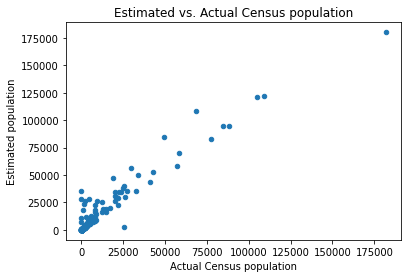

In [8]:
# Change column names
df = df.rename(columns={'POPLASTEST': 'Estimated population', 'POPLASTCEN': 'Actual Census population'})

# Plot. Now you have to use the new column names.
df.plot(x='Actual Census population', y='Estimated population', kind='scatter', title='Estimated vs. Actual Census population')

### Multiple columns

Let's look at a few more examples using some state population data. First read all of the data into a dataframe. **You should  open `state_yearly_populations` in ArcPro (it's a standalone table) and check out this dataset first!** Be sure to close Pro when you're done.

In [9]:
with arcpy.da.SearchCursor('data.gdb/state_yearly_populations', '*') as searcher:
    states = pd.DataFrame(searcher, columns=searcher.fields)
states.head()

,OBJECTID,STATE_NAME,STATE_FIPS,Population,Year,YearLabel
0,1,Alabama,01,4785579,2010,2010
1,2,Alabama,01,4798649,2011,2011
2,3,Alabama,01,4813946,2012,2012
3,4,Alabama,01,4827660,2013,2013
4,5,Alabama,01,4840037,2014,2014


Now let's pull out just the data for Colorado. To do that, use brackets to specify the condition for the rows to keep. So in this case, we want to keep the rows where STATE_NAME is 'Colorado' (column names and values are both case-sensitive!).

In [10]:
colorado = states[states.STATE_NAME == 'Colorado']
colorado

,OBJECTID,STATE_NAME,STATE_FIPS,Population,Year,YearLabel
32,33,Colorado,08,5048029,2010,2010
33,34,Colorado,08,5116411,2011,2011
34,35,Colorado,08,5186330,2012,2012
35,36,Colorado,08,5262556,2013,2013
36,37,Colorado,08,5342311,2014,2014
37,38,Colorado,08,5440445,2015,2015
38,39,Colorado,08,5530105,2016,2016
39,40,Colorado,08,5607154,2017,2017


Now let's plot the population by year.

<AxesSubplot:xlabel='Year'>

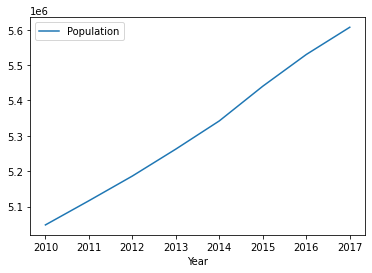

In [11]:
colorado.plot(x='Year', y='Population')

You can plot multiple columns at a time. As an example, I'm going to plot the data for the states I've lived in. First we need to grab the data for those states.

In [12]:
my_states = states[states.STATE_NAME.isin(['Utah', 'Arizona', 'Iowa', 'Colorado'])]
my_states.head()

,OBJECTID,STATE_NAME,STATE_FIPS,Population,Year,YearLabel
8,9,Arizona,04,6407002,2010,2010
9,10,Arizona,04,6465488,2011,2011
10,11,Arizona,04,6544211,2012,2012
11,12,Arizona,04,6616124,2013,2013
12,13,Arizona,04,6706435,2014,2014


Now we need to put each state in its own column. This tells pandas to use Year as the *index* (which means there will be a row for each year), to put each unique STATE_NAME in a column, and to keep the data from the Population column.

In [13]:
my_states_by_year = my_states.pivot(index='Year', columns='STATE_NAME', values='Population')
my_states_by_year

STATE_NAME,Arizona,Colorado,Iowa,Utah
Year,,,,
2010,6407002,5048029,3050223,2775260
2011,6465488,5116411,3063690,2815430
2012,6544211,5186330,3074386,2854222
2013,6616124,5262556,3089876,2899961
2014,6706435,5342311,3105563,2938671
2015,6802262,5440445,3118473,2984917
2016,6908642,5530105,3130869,3044321
2017,7016270,5607154,3145711,3101833


Now let's plot it!

<AxesSubplot:xlabel='Year'>

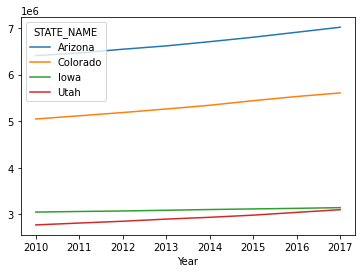

In [14]:
my_states_by_year.plot()

Let's break each state out into its own subplot by saying `subplots=True`, and we'll also make the figure a bit larger.

array([<AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>,
       <AxesSubplot:xlabel='Year'>, <AxesSubplot:xlabel='Year'>],
      dtype=object)

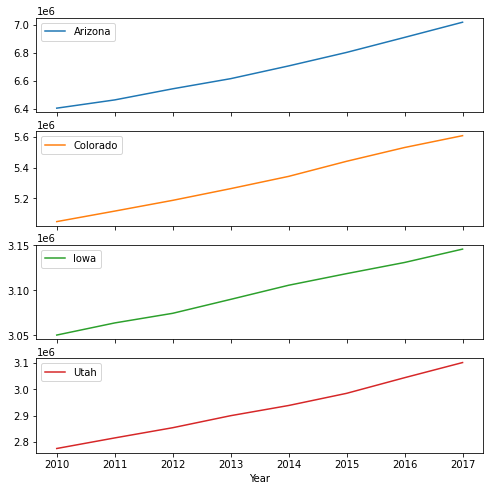

In [15]:
my_states_by_year.plot(subplots=True, figsize=(8,8))

Much better! 

Let's quickly look at a few other kinds of plots. Here's a bar chart.

<AxesSubplot:xlabel='Year'>

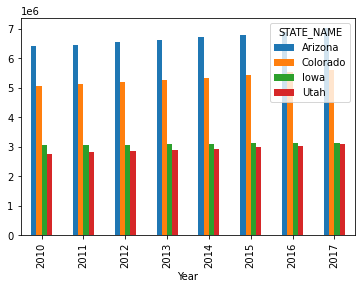

In [16]:
my_states_by_year.plot(kind='bar')

What if you wanted the bars ordered a different way? You can specify the order of the columns to use with double brackets:

<AxesSubplot:xlabel='Year'>

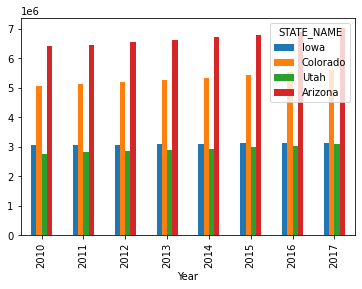

In [17]:
my_states_by_year[['Iowa', 'Colorado', 'Utah', 'Arizona']].plot(kind='bar')

An area plot show the relative population for each state in each year.

<AxesSubplot:xlabel='Year'>

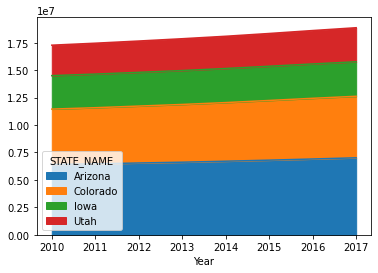

In [18]:
my_states_by_year.plot(kind='area')

Or how about a pie chart that shows relative area for a single year? In order to do that, we need to put the years in their own columns and each state in a row.

In [19]:
my_states_by_state = my_states.pivot(index='STATE_NAME', columns='Year', values='Population')
my_states_by_state

Year,2010,2011,2012,2013,2014,2015,2016,2017
STATE_NAME,,,,,,,,
Arizona,6407002,6465488,6544211,6616124,6706435,6802262,6908642,7016270
Colorado,5048029,5116411,5186330,5262556,5342311,5440445,5530105,5607154
Iowa,3050223,3063690,3074386,3089876,3105563,3118473,3130869,3145711
Utah,2775260,2815430,2854222,2899961,2938671,2984917,3044321,3101833


Now we can make a pie chart of 2017 data.

<AxesSubplot:ylabel='2017'>

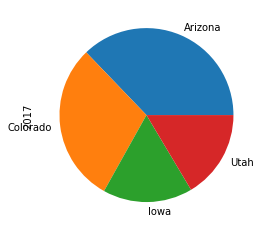

In [20]:
my_states_by_state.plot(y=2017, kind='pie', legend=False)

### Saving plots

You can save the plot with `savefig()` just like you did in the matplotlib notebook. Just make sure you import pyplot first.

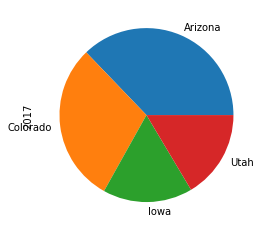

In [21]:
my_states_by_state.plot(y=2017, kind='pie', legend=False)
plt.savefig('pie.png')

There should be a `pie.png` file in your data folder now.